In [2]:

import matplotlib as plt
from inference.bertInference import getPredictions,getValData
from analysis.DataStatistics import get_truth, calc_metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
import numpy as np

labels = ['Organisation','Person','Location','Money','Temporal','Weapon','MilitaryPlatform','O']
extended_labels = ['Location','Quantity', 'Nationality', 'MilitaryPlatform', 'Temporal', 'Person', 'Organisation', 'Vehicle', 'Weapon','O']

In [3]:
gen_data_path = "../../data/selv-labeled-data/ValData/ValGEN.txt"
gen_conll_path = "../../data/selv-labeled-data/ValData/valgen.conll"
valDataGeneral = getValData(gen_data_path)

#Get predictions and truth vectors, label list
prediction_json = "../inference/Predictions/Bert/B07/bertPredictionsB07.json"
predictions = getPredictions(prediction_json, data = valDataGeneral)
#print(predictions.to_string())
prediction_vector = predictions['ner_tags'].tolist()

truth_set = get_truth(gen_conll_path)
#print(truth_set.to_string())
truth_vector = truth_set['ner_tags'].tolist()


In [ ]:
confusion_matrix_gen = confusion_matrix(truth_vector,prediction_vector, labels = labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_matrix_gen,
    class_names=labels,
    norm_colormap=plt.colors.LogNorm()
)


In [ ]:
gen_metrics_matrix = calc_metrics(confusion_matrix_gen, len(truth_vector))
classes = ["True","False"]

fig1, ax1 = plot_confusion_matrix(
    conf_mat=gen_metrics_matrix,
    class_names=classes,
    cmap= 'summer',
    colorbar=True,
    fontcolor_threshold=1,
    hide_spines = True
)

In [ ]:
ukraine_data_path = "../../data/selv-labeled-data/ValData/ukraine_val_text.txt"
ukraine_data_path2 = "../../data/selv-labeled-data/ValData/ukraine_val_text2.txt"
ukraine_conll_path = "../../data/selv-labeled-data/ValData/ukraine_val.conll"
ukraine_data = getValData(ukraine_data_path)
ukraine_data2 = getValData(ukraine_data_path2)
#####
# Need to split data amount into 2 parts because of BERT limitation on input length   
#####

ukraine_truth = get_truth(ukraine_conll_path)
#print(ukraine_truth.to_string())
ukraine_truth_vector = ukraine_truth['ner_tags'].tolist()
unique = set(ukraine_truth_vector)
#print(unique)

ukraine_prediction_json = "../inference/Predictions/Bert/B07/bertPredictionsB07V1.json"
ukraine_predictions = getPredictions(ukraine_prediction_json, data = ukraine_data)
ukraine_prediction_vector = ukraine_predictions['ner_tags'].tolist()
uk1_words = ukraine_predictions['words'].tolist()
#print(ukraine_predictions.to_string())

ukraine_prediction2_json = "../inference/Predictions/Bert/B07/bertPredictionsB07V2.json"
ukraine_predictions2 = getPredictions(ukraine_prediction2_json, data = ukraine_data2)
ukraine_prediction_vector2 = ukraine_predictions2['ner_tags'].tolist()
uk2_words = ukraine_predictions2['words'].tolist()
#print(ukraine_predictions2.to_string())

combined_vector = list(np.append(ukraine_prediction_vector,ukraine_prediction_vector2))




In [ ]:
confusion_matrix_ukraine = confusion_matrix(ukraine_truth_vector,combined_vector, labels = labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_matrix_ukraine,
    class_names=labels,
    norm_colormap=plt.colors.LogNorm()
)

In [ ]:
metrics_matrix = calc_metrics(confusion_matrix_ukraine, len(ukraine_truth_vector))
classes = ["True","False"]

fig1, ax1 = plot_confusion_matrix(
    conf_mat=metrics_matrix,
    class_names=classes,
    cmap= 'summer',
    colorbar=True,
    fontcolor_threshold=1,
    hide_spines = True
)

In [5]:
###VALIDATION FOR LLAMA2

#Method name "getTruth" is a bad name, as the function is just used to read a conll file into datastructure.
#Was initially intended to just read truth conll, hence the name. We should refactor the name
Llama_pred_gen_path = "../inference/Predictions/Llama2/L07/self_text_prediction.conll"
Llama_pred_ukraine_path = "../inference/Predictions/Llama2/L07/ukraine_prediction.conll"


gen_conll_path = "../../data/selv-labeled-data/ValData/valgen.conll"
ukraine_conll_path = "../../data/selv-labeled-data/ValData/ukraine_val.conll"
predictionsLlamaGen = get_truth(Llama_pred_gen_path)
predictionsLlamaUkraine = get_truth(Llama_pred_ukraine_path)
truth_set = get_truth(gen_conll_path)
ukraine_truth = get_truth(ukraine_conll_path)



truth_vector = truth_set['ner_tags'].tolist()
llamaGenVector  = predictionsLlamaGen['ner_tags'].tolist()
llamaUkraineVector = predictionsLlamaUkraine['ner_tags'].tolist()
ukraine_truth_vector = ukraine_truth['ner_tags'].tolist()




c:\conda\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


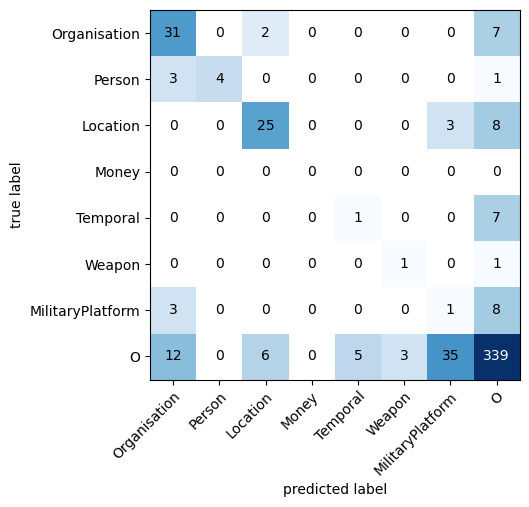

In [6]:
confusion_matrix_llama_gen = confusion_matrix(llamaGenVector,truth_vector, labels = labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_matrix_llama_gen,
    class_names=labels,
    norm_colormap=plt.colors.LogNorm()
)


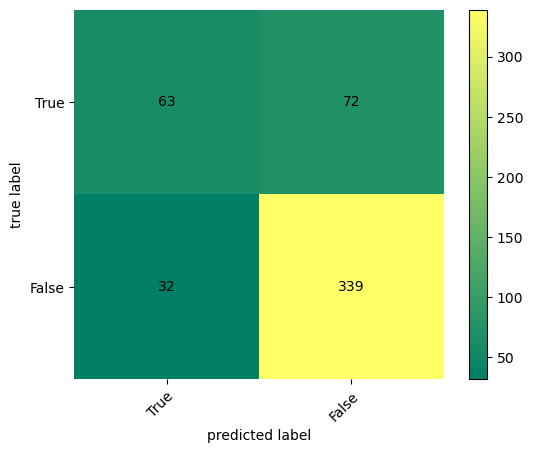

In [7]:
metrics_matrix = calc_metrics(confusion_matrix_llama_gen, len(truth_vector))
classes = ["True","False"]

fig1, ax1 = plot_confusion_matrix(
    conf_mat=metrics_matrix,
    class_names=classes,
    cmap= 'summer',
    colorbar=True,
    fontcolor_threshold=1,
    hide_spines = True
)